In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
X = pd.read_csv('defenders_rating_X.csv')
y = pd.read_csv('defenders_rating_y.csv')

In [3]:
#Show the first and last few records to check data is loading correctly
print(X.head())
print(y.tail())

   goals  assists  shots_ontarget  shots_offtarget  shotsblocked  \
0    1.0      0.0             0.0              0.0           0.0   
1    0.0      1.0             0.0              0.0           0.0   
2    1.0      0.0             0.0              0.0           0.0   
3    1.0      0.0             0.0              0.0           0.0   
4    0.0      0.0             1.0              0.0           0.0   

   chances2score  drib_success  drib_unsuccess  keypasses  touches  ...  \
0            0.0           0.0            0.00        0.0      0.0  ...   
1            0.0           0.2            0.25        0.0      0.0  ...   
2            0.0           0.0            0.00        0.0      0.0  ...   
3            0.0           0.0            0.00        0.0      0.0  ...   
4            0.0           0.0            0.00        0.0      0.0  ...   

   flow_success  betweenness2goals  minutesPlayed  game_duration  year  \
0      0.279569           0.646684       0.369738       0.000000  

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

X.dtypes

goals                     float64
assists                   float64
shots_ontarget            float64
shots_offtarget           float64
shotsblocked              float64
chances2score             float64
drib_success              float64
drib_unsuccess            float64
keypasses                 float64
touches                   float64
passes_acc                float64
passes_inacc              float64
crosses_acc               float64
crosses_inacc             float64
lballs_acc                float64
lballs_inacc              float64
grduels_w                 float64
grduels_l                 float64
aerials_w                 float64
aerials_l                 float64
poss_lost                 float64
fouls                     float64
wasfouled                 float64
clearances                float64
stop_shots                float64
interceptions             float64
tackles                   float64
dribbled_past             float64
tballs_acc                float64
tballs_inacc  

In [5]:
import pandas as pd

# Assuming X_train_corr is your DataFrame
df = X

# Iterate through each column and check for columns with a single unique value
single_value_columns = [column for column in df.columns if df[column].nunique() == 1]

# Print columns with a single unique value
print("Columns with a single unique value:")
for column in single_value_columns:
    print(column)

Columns with a single unique value:


In [6]:
X.degree_centrality.value_counts()

degree_centrality
0.000000    5671
0.333333     217
0.666667       9
1.000000       1
Name: count, dtype: int64

In [7]:
X.shape

(5898, 51)

In [8]:
X.columns

Index(['goals', 'assists', 'shots_ontarget', 'shots_offtarget', 'shotsblocked',
       'chances2score', 'drib_success', 'drib_unsuccess', 'keypasses',
       'touches', 'passes_acc', 'passes_inacc', 'crosses_acc', 'crosses_inacc',
       'lballs_acc', 'lballs_inacc', 'grduels_w', 'grduels_l', 'aerials_w',
       'aerials_l', 'poss_lost', 'fouls', 'wasfouled', 'clearances',
       'stop_shots', 'interceptions', 'tackles', 'dribbled_past', 'tballs_acc',
       'tballs_inacc', 'ycards', 'rcards', 'dangmistakes', 'countattack',
       'offsides', 'missed_penalties', 'owngoals', 'degree_centrality',
       'betweenness_centrality', 'closeness_centrality', 'flow_centrality',
       'flow_success', 'betweenness2goals', 'minutesPlayed', 'game_duration',
       'year', 'month', 'day', 'pos_role_DC', 'pos_role_DL', 'pos_role_DR'],
      dtype='object')

In football (soccer), player positions are grouped into four main categories: Goalkeepers, Defenders, Midfielders, and Forwards. Each of the columns you mentioned in your dataset corresponds to a specific position within these categories. Here’s a detailed breakdown:

Goalkeepers (GK)
GK (Goalkeeper): The primary role is to prevent the opposing team from scoring by guarding the goal. Goalkeepers are the only players allowed to use their hands, but only within the penalty area.
Defenders
LB (Left Back): A defender positioned on the left side, responsible for preventing opposition attacks down the right wing.
LCB (Left Center Back): A central defender on the left side of the defense.
CB (Center Back): Central defenders who protect the area directly in front of the goal.
RCB (Right Center Back): A central defender on the right side of the defense.
RB (Right Back): A defender positioned on the right side, responsible for preventing opposition attacks down the left wing.
LWB (Left Wing Back): Similar to a left back but with more offensive duties, often seen in formations with three central defenders.
RWB (Right Wing Back): Similar to a right back but with more offensive duties, often seen in formations with three central defenders.
Midfielders
CDM (Center Defensive Midfielder): Positioned in front of the defenders, focusing on intercepting the ball and breaking up opposition plays.
LDM (Left Defensive Midfielder): A defensive midfielder on the left side.
RDM (Right Defensive Midfielder): A defensive midfielder on the right side.
CM (Center Midfielder): Plays centrally, linking defense and attack, often covering both defensive and offensive roles.
LCM (Left Center Midfielder): A central midfielder leaning towards the left.
RCM (Right Center Midfielder): A central midfielder leaning towards the right.
CAM (Center Attacking Midfielder): Positioned behind the forwards, focusing on creating scoring opportunities.
LAM (Left Attacking Midfielder): An attacking midfielder on the left side.
RAM (Right Attacking Midfielder): An attacking midfielder on the right side.
LM (Left Midfielder): Positioned on the left side of the midfield, balancing defense and attack.
RM (Right Midfielder): Positioned on the right side of the midfield, balancing defense and attack.
Forwards
ST (Striker): The primary goal-scorer, positioned closest to the opponent's goal.
LS (Left Striker): A forward on the left side of the attack.
RS (Right Striker): A forward on the right side of the attack.
CF (Center Forward): Similar to a striker but may play slightly deeper, involved in both scoring and assisting.
LF (Left Forward): Positioned on the left side, slightly behind the main striker.
RF (Right Forward): Positioned on the right side, slightly behind the main striker.
LW (Left Winger): Positioned on the left wing, focused on delivering crosses and creating scoring opportunities from wide positions.
RW (Right Winger): Positioned on the right wing, focused on delivering crosses and creating scoring opportunities from wide positions.
These groupings ensure a balanced distribution of responsibilities on the field, with each position playing a crucial role in the team's overall strategy​ (Football Guide)​​ (Jobs In Football)​​ (Soccermodo)​.

https://www.football-guide.com/soccer-info/soccer-positions-explained.html

https://jobsinfootball.com/blog/soccer-positions/

https://soccermodo.com/soccer-positions/






In [9]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd


# Perform feature selection using SelectKBest with f_regression
selector = SelectKBest(score_func=f_regression, k='all')  # Select all features
selector.fit(X, y)

# Get the scores of each feature
scores = selector.scores_

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_scores)

                   Feature       Score
0                    fouls  909.654885
1          shots_offtarget  583.590468
2              crosses_acc  422.091121
3                     year  391.300410
4            chances2score  332.450834
5             shotsblocked  262.005715
6                aerials_l  251.439346
7                  tackles  249.559543
8            game_duration  248.984756
9             tballs_inacc  237.792107
10                   month  209.160109
11           minutesPlayed  158.120401
12           crosses_inacc  152.919061
13         flow_centrality  152.643439
14                 touches  109.600390
15              clearances  103.962110
16                offsides  100.628322
17              tballs_acc   99.716395
18               keypasses   90.430747
19               wasfouled   87.477911
20             countattack   86.482221
21                owngoals   78.087336
22            passes_inacc   74.777625
23           dribbled_past   74.670041
24               grduels_

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_regression


# Perform feature selection using SelectKBest with mutual_info_regression
selector = SelectKBest(score_func=mutual_info_regression, k='all')  # Select all features
selector.fit(X, y)

# Get the scores of each feature
scores = selector.scores_

# Create a DataFrame for better visualization
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the features by score in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_scores)

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                   Feature     Score
0                    fouls  0.071239
1                     year  0.046654
2            crosses_inacc  0.038433
3          shots_offtarget  0.036215
4            chances2score  0.034910
5              crosses_acc  0.030639
6          flow_centrality  0.022886
7                aerials_l  0.022409
8                    month  0.021353
9            dribbled_past  0.019900
10           minutesPlayed  0.019091
11            flow_success  0.017659
12           game_duration  0.016502
13               keypasses  0.015570
14                 tackles  0.015354
15             countattack  0.015214
16              clearances  0.014738
17                   goals  0.013262
18            drib_success  0.012270
19            shotsblocked  0.011852
20               wasfouled  0.011000
21       betweenness2goals  0.010252
22              tballs_acc  0.010094
23                 touches  0.008811
24            lballs_inacc  0.008644
25               grduels_l  0.008480
2

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                   Feature  Importance
0                    fouls    0.128471
1          shots_offtarget    0.081321
2                  tackles    0.040378
3                aerials_l    0.039573
4             shotsblocked    0.037372
5              crosses_acc    0.037190
6             tballs_inacc    0.029269
7            game_duration    0.025341
8               tballs_acc    0.024553
9            dribbled_past    0.019780
10                 touches    0.019314
11               grduels_l    0.018779
12            flow_success    0.018323
13           minutesPlayed    0.018199
14                owngoals    0.018102
15              stop_shots    0.018089
16             countattack    0.018053
17       betweenness2goals    0.017860
18           crosses_inacc    0.017499
19             pos_role_DR    0.017244
20               wasfouled    0.017098
21                    year    0.017027
22        missed_penalties    0.016982
23              clearances    0.016961
24           interception

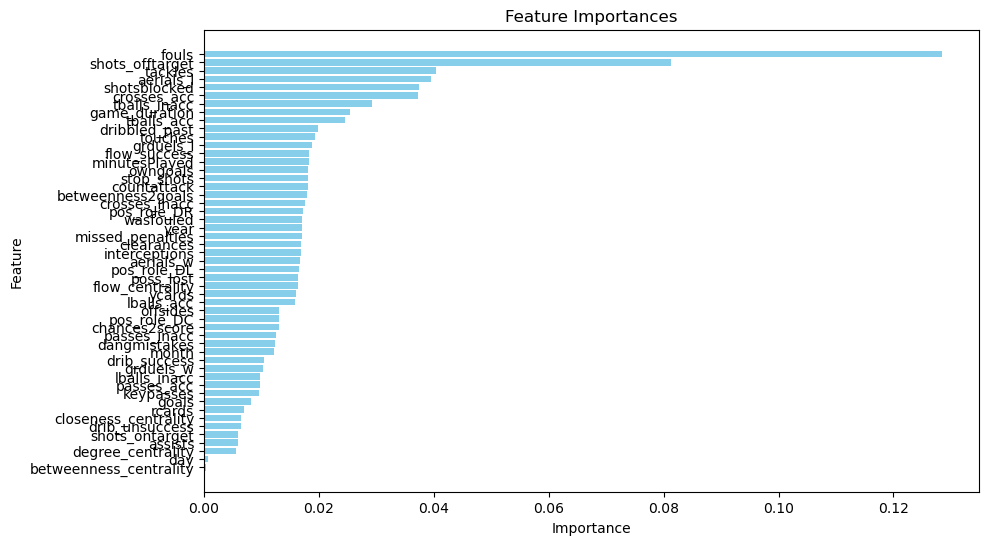

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

# Fit an ExtraTreesRegressor model
model = ExtraTreesRegressor(random_state=42)
model.fit(X, y)

# Get the feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the ranked features
print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [12]:
import pandas as pd

# Combine X and y into a single DataFrame
data = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
data.corr()

,goals,assists,shots_ontarget,shots_offtarget,shotsblocked,chances2score,drib_success,drib_unsuccess,keypasses,touches,passes_acc,passes_inacc,crosses_acc,crosses_inacc,lballs_acc,lballs_inacc,grduels_w,grduels_l,aerials_w,aerials_l,poss_lost,fouls,wasfouled,clearances,stop_shots,interceptions,tackles,dribbled_past,tballs_acc,tballs_inacc,ycards,rcards,dangmistakes,countattack,offsides,missed_penalties,owngoals,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,flow_success,betweenness2goals,minutesPlayed,game_duration,year,month,day,pos_role_DC,pos_role_DL,pos_role_DR,original_rating
goals,1.000000,-0.615864,-0.615864,0.053510,-0.098581,0.041676,-0.020917,-0.087830,0.048983,-0.241933,-0.308732,-0.282076,-0.073296,0.189566,-0.132800,-0.484684,-0.596349,0.285993,0.138585,-0.228361,-0.286857,0.323331,0.146081,-0.410384,-0.009309,-0.098824,0.273377,0.241469,-0.059165,0.072453,-0.092785,-0.050583,-0.026375,0.013339,0.014587,0.024500,-0.087290,-0.054523,-0.018179,0.035153,-0.001120,-0.072669,-0.170101,-0.120662,0.000437,-0.049038,0.030637,0.003312,-0.000110,0.016962,-0.000994,0.049644
assists,-0.615864,1.000000,-0.241423,-0.026100,0.065116,-0.019633,0.043714,0.086759,-0.001581,0.142000,0.200019,0.172302,0.053819,-0.103593,0.069649,0.300278,0.399684,-0.183604,-0.086180,0.135772,0.126495,-0.207845,-0.105758,0.259366,-0.017631,0.022132,-0.166841,-0.171667,0.037887,-0.058448,0.052316,0.005026,0.004655,-0.023597,-0.016011,-0.015728,0.061756,0.005623,0.011196,-0.028954,-0.000670,0.050327,0.105479,0.083228,0.000350,0.043667,-0.010550,-0.002040,0.000419,-0.010622,0.000238,-0.032782
shots_ontarget,-0.615864,-0.241423,1.000000,-0.039809,0.056309,-0.031700,-0.017951,0.021424,-0.058752,0.155996,0.180254,0.175139,0.036462,-0.129901,0.093924,0.296720,0.334856,-0.168662,-0.084519,0.145507,0.226834,-0.190411,-0.074174,0.246115,0.029098,0.099592,-0.169886,-0.125757,0.034988,-0.030793,0.061970,0.057278,0.027833,0.007167,-0.001956,-0.014449,0.045762,0.061535,0.011196,-0.014345,0.002049,0.039182,0.104039,0.065394,-0.000887,0.016735,-0.027186,-0.002040,-0.000284,-0.010270,0.000986,-0.028365
shots_offtarget,0.053510,-0.026100,-0.039809,1.000000,0.006078,0.528154,0.015241,-0.011381,0.037410,-0.005414,-0.023018,-0.017863,0.031501,0.038986,-0.019999,-0.038734,-0.037698,-0.002126,0.002702,-0.019133,-0.047925,0.065655,-0.003018,-0.028446,-0.011036,0.002910,0.030757,0.021398,-0.019688,-0.005776,-0.046378,0.012012,0.000773,-0.002609,0.003049,0.009193,0.014741,-0.015717,0.022222,-0.006798,0.046447,0.023041,0.006607,0.023023,0.126798,0.331599,0.024776,0.007900,0.008689,0.005541,-0.021409,0.300110
shotsblocked,-0.098581,0.065116,0.056309,0.006078,1.000000,0.010611,0.013174,0.002595,0.013093,0.052958,0.038127,0.065505,0.055666,0.015359,0.028424,0.214182,0.095543,-0.010398,0.000914,0.042690,0.007912,-0.036910,-0.011512,0.072175,-0.013299,-0.000027,-0.026938,-0.034314,-0.002637,-0.011550,0.021860,0.108617,0.031726,-0.002513,-0.011357,-0.011960,0.040582,0.014342,-0.005923,0.003356,0.022792,0.002433,0.033298,0.060478,0.123536,0.439529,0.004850,-0.009901,-0.005916,0.000329,-0.010177,0.206270
chances2score,0.041676,-0.019633,-0.031700,0.528154,0.010611,1.000000,0.102234,0.058119,0.508733,0.033427,-0.000301,-0.002442,0.081660,0.062799,0.003092,-0.018171,-0.000665,0.010818,0.008247,0.013972,-0.033536,0.090355,0.026270,0.007934,-0.004608,0.000446,0.001882,-0.000172,-0.014376,-0.013560,-0.043700,0.026063,0.000874,-0.004357,-0.012944,0.008431,0.009477,0.014567,0.004146,0.007898,0.125143,0.065878,0.055493,0.051549,0.211205,0.185131,0.034995,0.004260,0.007917,0.005044,-0.026056,0.231033
drib_success,-0.020917,0.043714,-0.017951,0.015241,0.013174,0.102234,1.000000,0.579834,0.642498,0.059651,0.027938,0.056030,0.198960,0.139935,0.049003,0.051966,0.109239,0.030459,0.005672,0.065558,-0.024053,0.128915,0.050721,0.156396,0.010521,0.006968,-0.053809,-0.029841,-0.001217,0.001306,-0.025428,0.060942,0.050751,-0.005803,-0.012732,0.004852,0.040174,-0.016813,0.010

<Axes: >

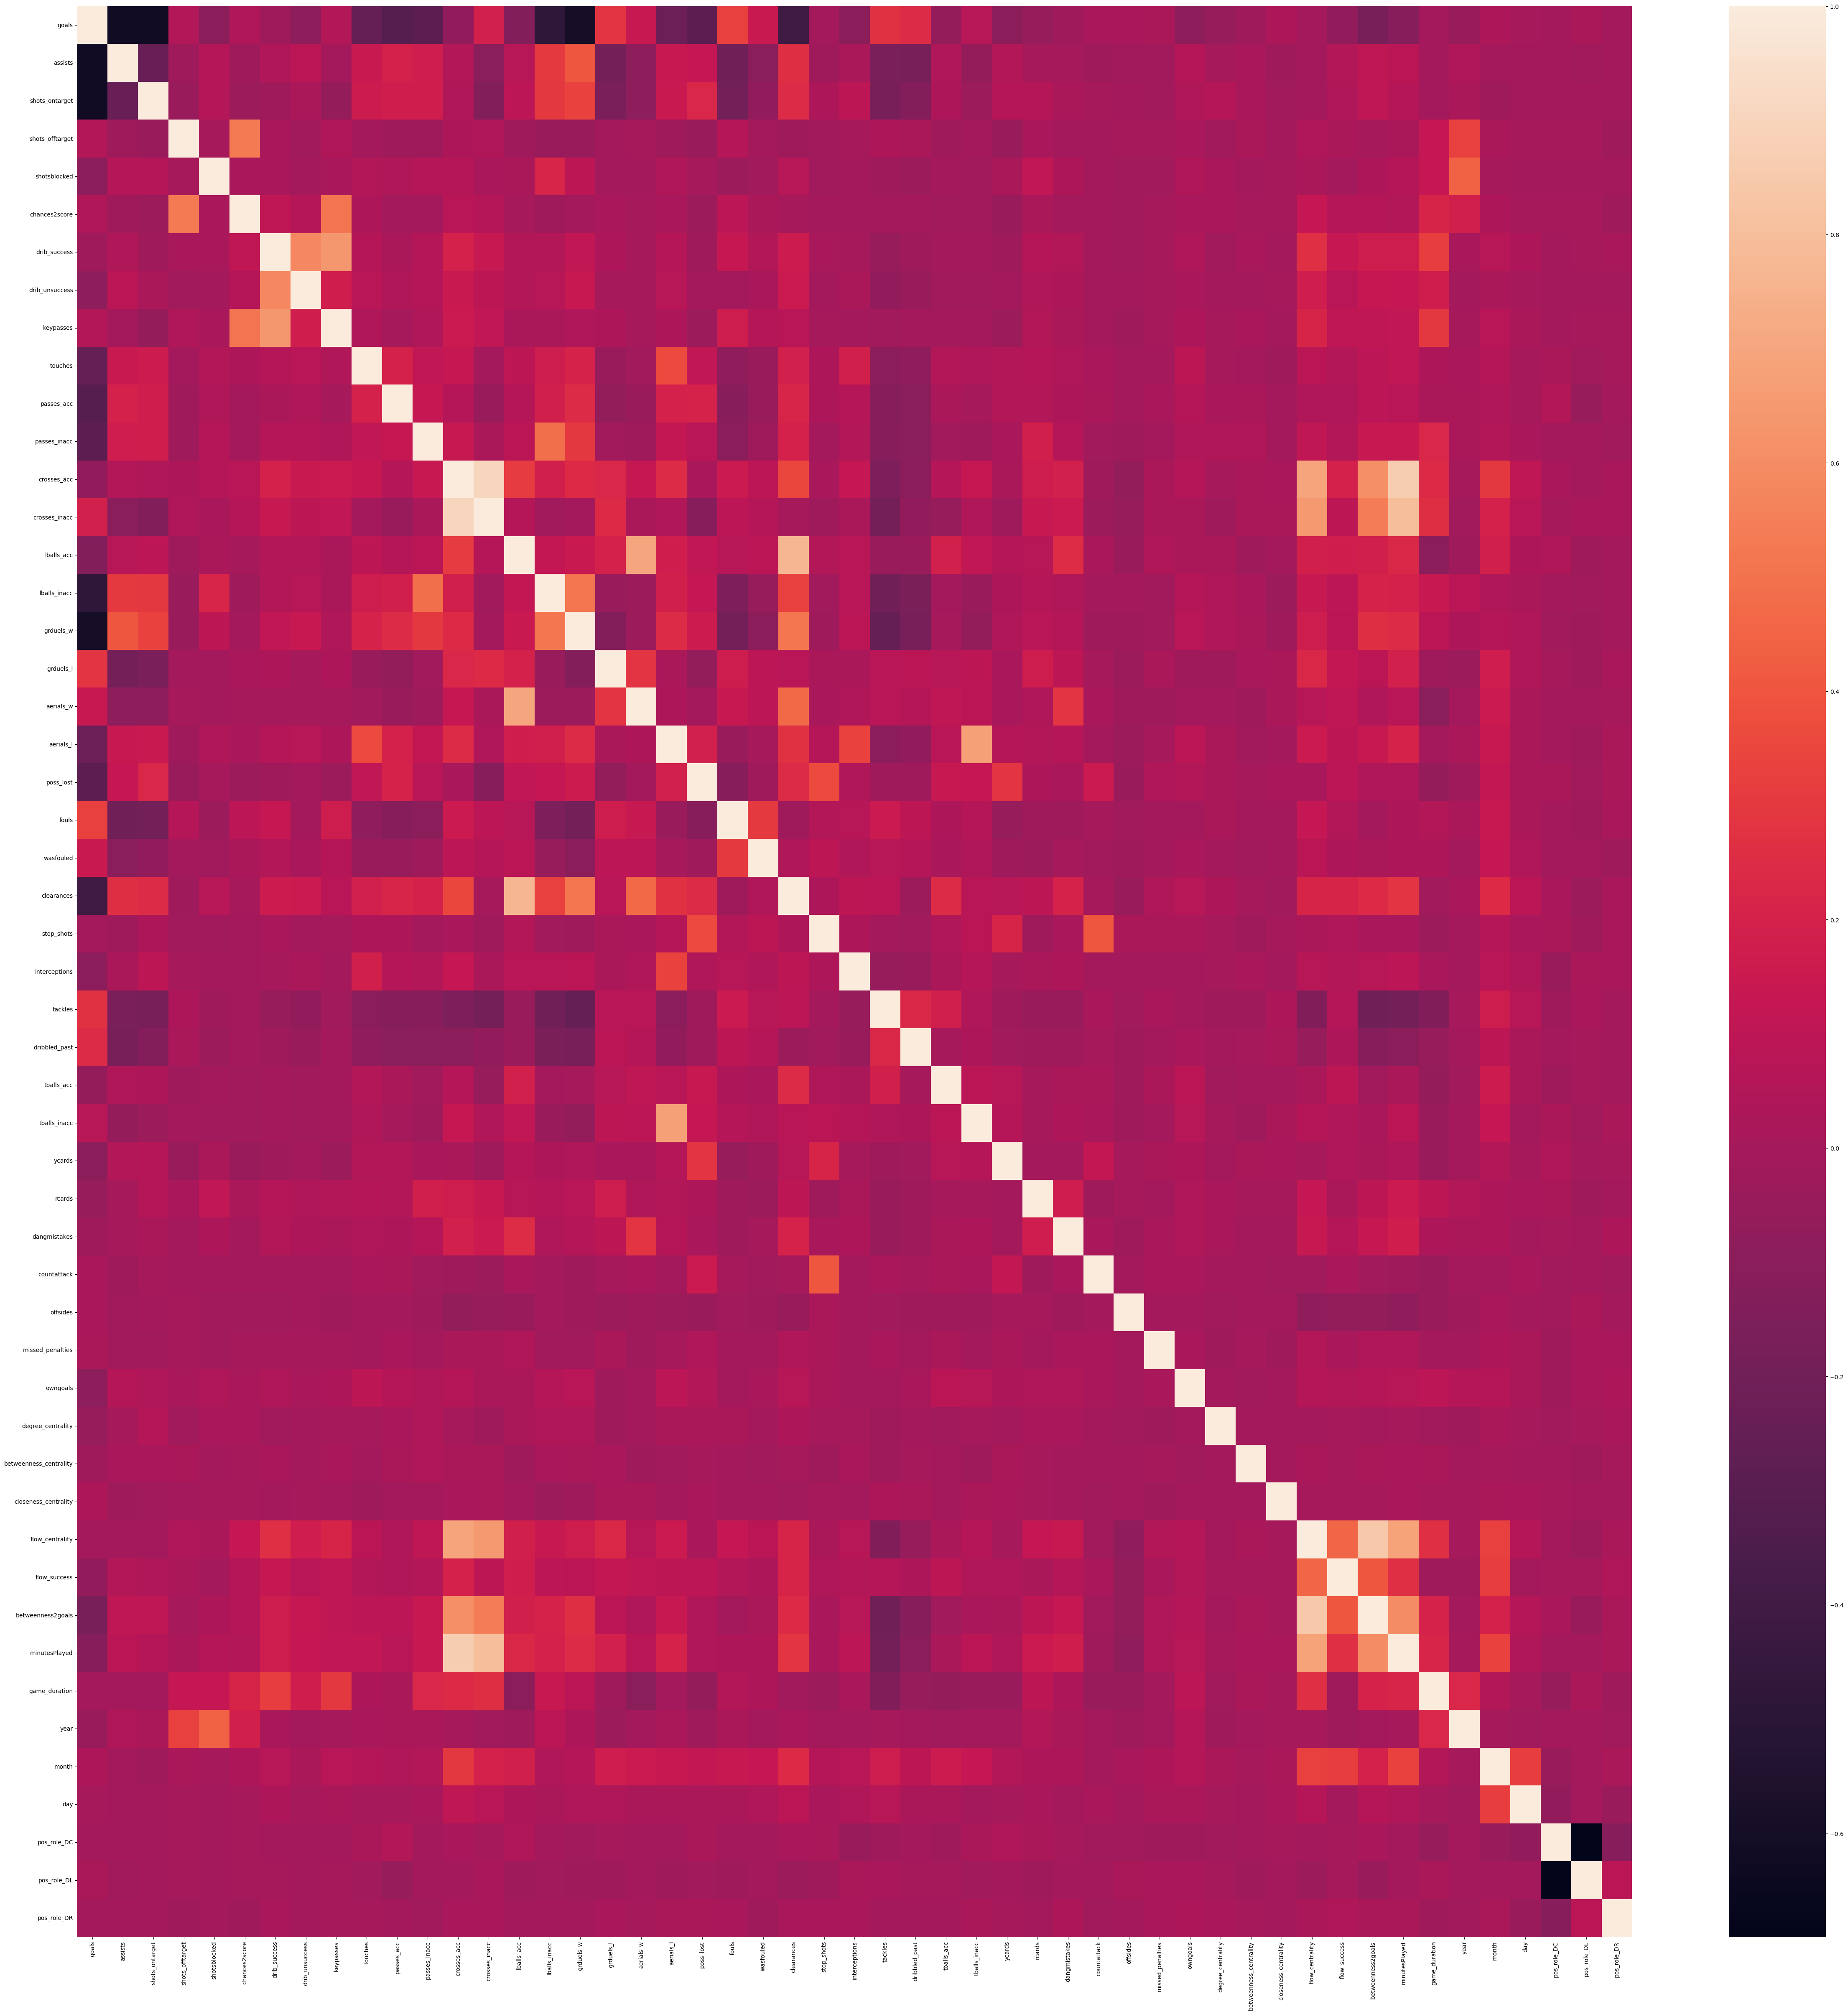

In [13]:
corr = data.drop(columns=['original_rating'], axis=1).corr()
top_features = corr.index
plt.figure(figsize=(60,60))
sns.heatmap(data[top_features].corr(), annot=False)

In [14]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
threshold = 0.8
correlation(data.drop(columns=['original_rating'], axis=1), threshold)

{'betweenness2goals', 'crosses_inacc', 'minutesPlayed'}

In [16]:
#check the columns to know which other they are correlated with
def correlated_columns(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    correlated_pairs = []

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname1 = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                col_corr.add(colname1)
                col_corr.add(colname2)
                correlated_pairs.append((colname1, colname2, corr_matrix.iloc[i, j]))

    return col_corr, correlated_pairs

In [17]:
threshold = 0.8
col_corr, correlated_pairs = correlated_columns(data.drop(columns=['original_rating'], axis=1), threshold)

print("Highly correlated columns:")
print(col_corr)

print("\nPairs of highly correlated columns with their correlation coefficients:")
for pair in correlated_pairs:
    print(pair)

Highly correlated columns:
{'betweenness2goals', 'crosses_acc', 'minutesPlayed', 'flow_centrality', 'crosses_inacc'}

Pairs of highly correlated columns with their correlation coefficients:
('crosses_inacc', 'crosses_acc', 0.9026415855021606)
('betweenness2goals', 'flow_centrality', 0.8466404160514489)
('minutesPlayed', 'crosses_acc', 0.8667558237648165)


In [ ]:
# Save X and y to CSV files
#change to goalkeeprs features later
#X.to_csv('defenders_featusres.csv', index=False)
#y.to_csv('defenders_target.csv', index=False)

#print("Files saved: 'defenders_features.csv' and 'defenders_target.csv'")